# Análise do Impacto da COVID-19 com Dados do PNAD-COVID-19
Este notebook tem como objetivo analisar os impactos da pandemia da COVID-19 na população brasileira utilizando os dados do PNAD-COVID-19 do IBGE. 
Nosso foco será:
- Características clínicas dos sintomas da COVID-19.
- Comportamento da população durante a pandemia.
- Características econômicas e sociais da população afetada.
Essas análises ajudarão um grande hospital a planejar ações para um possível novo surto da doença.

In [442]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [443]:
# Definindo a url do dataset
data_url = 'https://datalakedtat.blob.core.windows.net/techchallenge3/pnad_covid_mes_9_10_11.microdados91011.csv'

In [444]:
# Lendo o dataset
df = pd.read_csv(data_url, sep=',', encoding='utf-8', engine='python')

In [445]:
# Exibindo as primeiras linhas do dataset
df.head()

,febre,dor_olhos,cheiro_sabor,dor_muscular,diarreia,tosse,dor_garganta,dificuldade_respiracao,dor_cabeca,dor_peito,...,idade,sexo,raca_cor,escolaridade,trabalho,faixa_salario,tp_domicilio,uf,mes,domicilio
0,2,2,2,2,2,2,2,2,2,2,...,18,2,1,5,2.0,NaN,1,AP,9,1
1,2,2,2,2,2,2,2,2,1,2,...,64,2,4,2,1.0,2.0,1,AP,9,1
2,2,2,2,2,2,2,2,2,2,2,...,15,2,4,4,2.0,NaN,2,AP,9,1
3,2,2,2,2,2,2,2,2,2,2,...,15,2,4,4,2.0,NaN,5,AP,9,1
4,2,2,2,2,2,2,2,2,2,2,...,60,1,4,5,2.0,NaN,1,AP,9,1


In [446]:
# Exibindo as informações de tamanho do dataset
df.shape

(1149197, 43)

In [447]:
#f.fillna(0, inplace=True)

In [448]:
# Exibindo as informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149197 entries, 0 to 1149196
Data columns (total 43 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   febre                   1149197 non-null  int64  
 1   dor_olhos               1149197 non-null  int64  
 2   cheiro_sabor            1149197 non-null  int64  
 3   dor_muscular            1149197 non-null  int64  
 4   diarreia                1149197 non-null  int64  
 5   tosse                   1149197 non-null  int64  
 6   dor_garganta            1149197 non-null  int64  
 7   dificuldade_respiracao  1149197 non-null  int64  
 8   dor_cabeca              1149197 non-null  int64  
 9   dor_peito               1149197 non-null  int64  
 10  nausea                  1149197 non-null  int64  
 11  nariz_ntupido           1149197 non-null  int64  
 12  fadiga                  1149197 non-null  int64  
 13  foi_estab_saude         44950 non-null    float64
 14  ub

In [449]:
# Criando copia do dataset
df_copy = df.copy()

In [450]:
# Criando uma lista com as colunas
dfcolumns = df_copy.columns.tolist()
dfcolumns

['febre',
 'dor_olhos',
 'cheiro_sabor',
 'dor_muscular',
 'diarreia',
 'tosse',
 'dor_garganta',
 'dificuldade_respiracao',
 'dor_cabeca',
 'dor_peito',
 'nausea',
 'nariz_ntupido',
 'fadiga',
 'foi_estab_saude',
 'ubs',
 'upa',
 'hospital_sus',
 'ambulatorio_pv',
 'pront_scrr_pv',
 'hospital_pv',
 'internado',
 'entubado_resp_art',
 'plano_saude',
 'diabetes',
 'hipertesao',
 'doenca_resp',
 'doenca_coracao',
 'depressao',
 'cancer',
 'teste_positivo',
 'restringiu_contato',
 'tem_alcool',
 'tem_mascara',
 'idade',
 'sexo',
 'raca_cor',
 'escolaridade',
 'trabalho',
 'faixa_salario',
 'tp_domicilio',
 'uf',
 'mes',
 'domicilio']

In [451]:
# Usando funcão cut para definir os grupos de faixa etária
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100, 111]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100','101-111']

# Criar a nova coluna com os grupos de idade
df_copy['faixa_etaria'] = pd.cut(df_copy['idade'], bins=bins, labels=labels, right=True)

In [452]:
# Selecionar colunas relevantes (no máximo 20 variáveis)
sintomas_cols = [
    'febre', 'dor_olhos', 'cheiro_sabor', 'dor_muscular', 'diarreia',
    'tosse', 'dor_garganta', 'dificuldade_respiracao', 'dor_cabeca',
    'dor_peito', 'nausea', 'nariz_ntupido', 'fadiga', 'teste_positivo'
]
comportamento_cols = ['foi_estab_saude', 'entubado_resp_art', 'plano_saude']
economia_cols = ['domicilio', 'mes', 'faixa_etaria', 'sexo','escolaridade','trabalho','faixa_salario','tp_domicilio']  # Adicionadas colunas de faixa etária e gênero
tp_est_saude_cols = ['ubs', 'upa', 'hospital_sus', 'ambulatorio_pv', 'pront_scrr_pv', 'hospital_pv']
doencas_cols = ['diabetes','hipertesao','doenca_resp','doenca_coracao','depressao','cancer']

In [453]:
# Verificar se todas as colunas existem antes de prosseguir
missing_cols = [col for col in economia_cols if col not in df.columns]
if missing_cols:
    print(f"As seguintes colunas não foram encontradas no DataFrame: {missing_cols}")
    # Remover colunas ausentes para evitar erro
    economia_cols = [col for col in economia_cols if col in df.columns]

selected_cols = sintomas_cols + comportamento_cols + economia_cols + doencas_cols + tp_est_saude_cols

df_selected = df_copy[selected_cols]

As seguintes colunas não foram encontradas no DataFrame: ['faixa_etaria']


In [454]:
# Criando dataset com os sintomas
sintomas = df_copy[sintomas_cols]

In [455]:
# verificando a quantidade de valores casos positivos e negativos
df.loc[:, 'teste_positivo'].value_counts()

teste_positivo
não    1116275
sim      32922
Name: count, dtype: int64

In [456]:
# Vericando quantidade de casos positivos e negativos total
df_testes = df.loc[:, 'teste_positivo'].count()
df_testes

1149197

In [457]:
# Verificando quantidade de casos positivos
df_testes_p = df['teste_positivo'].value_counts().get('sim', 0)
df_testes_p

32922

In [458]:
# Porcentagem de casos positivos
pct_positivo = df_testes_p * 100 / df_testes
pct_positivo

2.8647829745465745

In [459]:
# Valores se uma pessoa foi atendida em um estabelecimento de saúde
df.loc[:, 'foi_estab_saude'].value_counts()

foi_estab_saude
2.0    33141
1.0    11796
9.0       13
Name: count, dtype: int64

In [460]:
# Definindo os sexos em strings
df_copy['sexo'] = df_copy['sexo'].map({1: 'F', 2: 'M'})


In [461]:
# Definindo as raças em strings
df_copy['raca_cor'] = df_copy['raca_cor'].map({1: 'Branca', 2: 'Preta', 3: 'Amarela', 4: 'Parda', 5: 'Indígena', 6: 'Ignorado'})

In [462]:
# Definindo as escolaridades em strings
df_copy['escolaridade'] = df_copy['escolaridade'].map({1: 'Sem_instrução', 2: 'Fundamental_incompleto', 3: 'Fundamental_complete',
                                                        4: 'Médio_incompleto', 5: 'Médio_completo', 6: 'Superior_imcompleto', 
                                                        7: 'Superior_completo',8: 'Superior_completo', 9: 'Pós_graduação'})

In [463]:
# Definindo as faixas salariais em strings
df_copy['faixa_salario'] = df_copy['faixa_salario'].map({0: '0 - 100', 1: '101 - 300', 2: '301 - 600',
                                                          3: '601 - 800', 4: '801 - 1.600', 5: '1.601 - 3.000', 
                                                          6: '3.001 - 10.000', 7: '10.001 - 50.000', 8: '50.001 - 100.000', 9: '100.000+'})

In [464]:
# Definindo os tipos de domicílio em strings
df_copy['tp_domicilio'] = df_copy['tp_domicilio'].map({1: 'proprio_pago', 2: 'proprio_pagando', 3: 'alugado', 
                                                       4: 'cedido_empregador', 5: 'cedido_familiar',6: 'cedido_outro', 7: 'outro'})

In [465]:
# Definindo se a pessoa trabalha em strings
df_copy['trabalho'] = df_copy['trabalho'].map({1: 'sim', 2: 'nao'})

In [466]:
# Definindo se a pessoa mora em área urbana ou rural
df_copy['domicilio'] = df_copy['domicilio'].map({1: 'urbano', 2: 'rural'})

In [467]:
# Definindo se a pessoa tem plano de saúde
df_copy['plano_saude'] = df_copy['plano_saude'].map({1: 'sim', 2: 'nao', 9: 'ignorado'})

In [468]:
# Definindo se a pessoa foi atendida em um estabelecimento de saúde
df_copy['foi_estab_saude'] = df_copy['foi_estab_saude'].map({1: 'sim', 2: 'nao', 9: 'ignorado'})

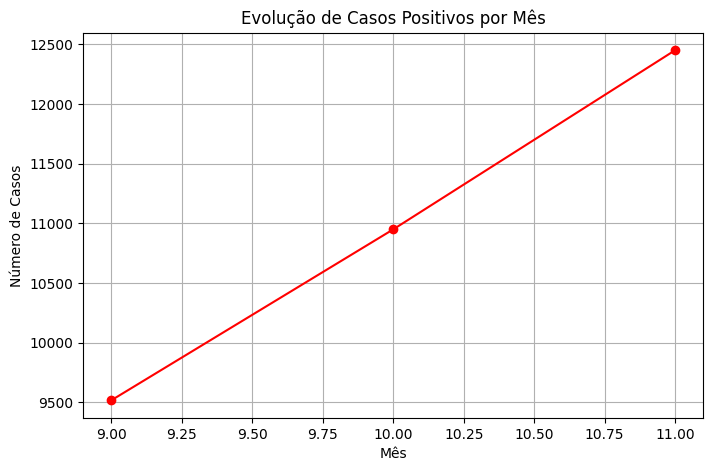

In [469]:
# Evolução dos casos positivos ao longo dos meses
plt.figure(figsize=(8, 5))
casos_positivos = df_copy[df_copy['teste_positivo'] == 'sim']
casos_por_mes = casos_positivos.groupby('mes').size()
casos_por_mes.plot(kind='line', marker='o', color='red')
plt.title('Evolução de Casos Positivos por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Casos')
plt.grid(True)
plt.show()


In [470]:
# Certificar-se de que 'teste_positivo' está em formato numérico
df['teste_positivo'] = df['teste_positivo'].map({'Sim': 1, 'Não': 0}).fillna(0).astype(int)

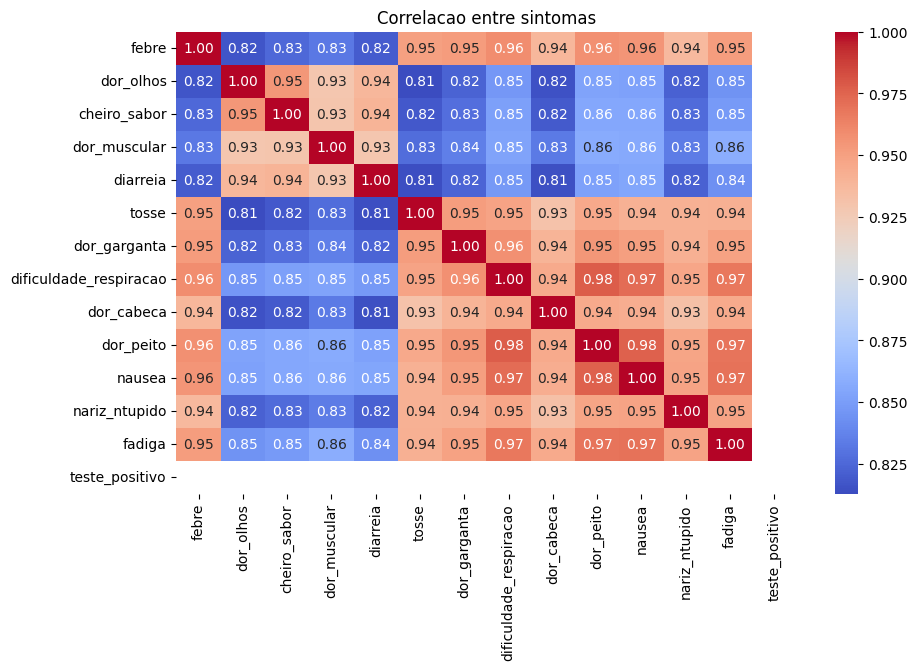

In [471]:
# Visualização de distribuição de sintomas
plt.figure(figsize=(10, 6))
sns.heatmap(df[sintomas_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlacao entre sintomas')
plt.show()

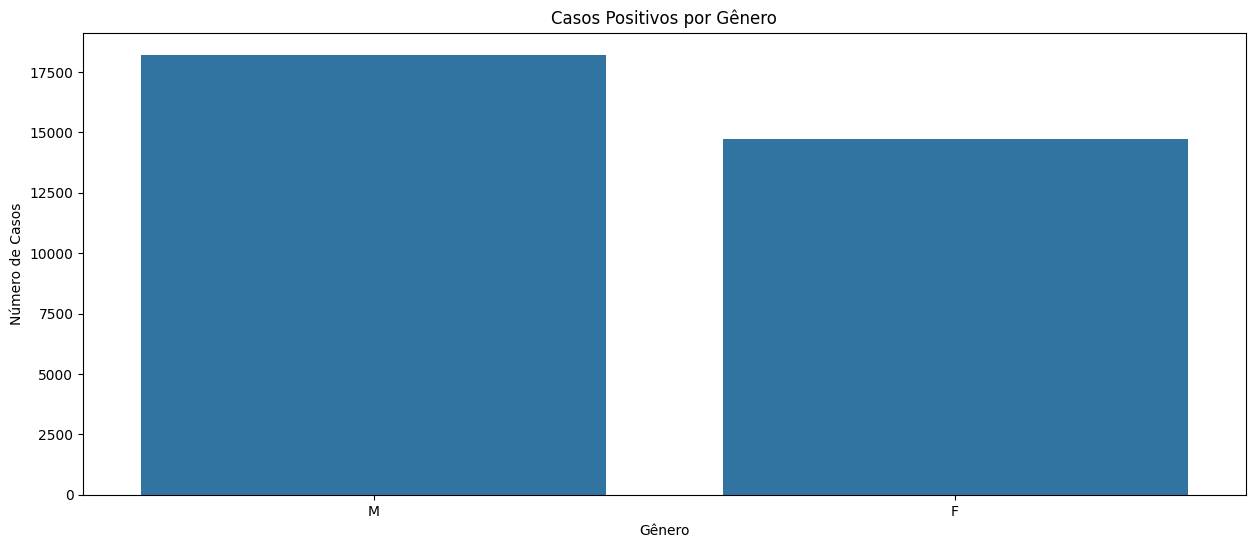

In [472]:
# Distribuição de casos positivos por Gênero
plt.figure(figsize=(15,6))
sns.countplot(data=df_copy[df_copy['teste_positivo'] == 'sim'], x='sexo')
plt.title('Casos Positivos por Gênero')
plt.ylabel('Número de Casos')
plt.xlabel('Gênero')
plt.show()

In [473]:
# Transformando a faixa etária em categórica
df_copy['faixa_etaria'] = pd.Categorical(
    df_copy['faixa_etaria'], 
    categories=['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', '101-111'], 
    ordered=True
)

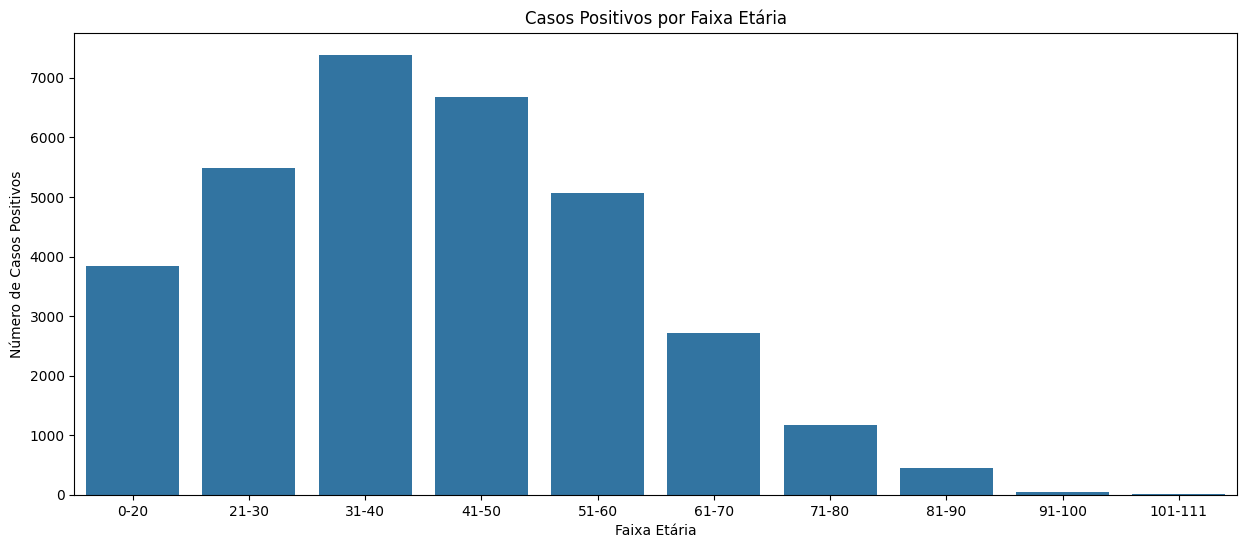

In [474]:
# Distribuição de casos positivos por Faixa Etária
plt.figure(figsize=(15,6))
sns.countplot(data=df_copy[df_copy['teste_positivo'] == 'sim'], x='faixa_etaria')
plt.ylabel('Número de Casos Positivos')
plt.xlabel('Faixa Etária')
plt.title('Casos Positivos por Faixa Etária')
plt.show()

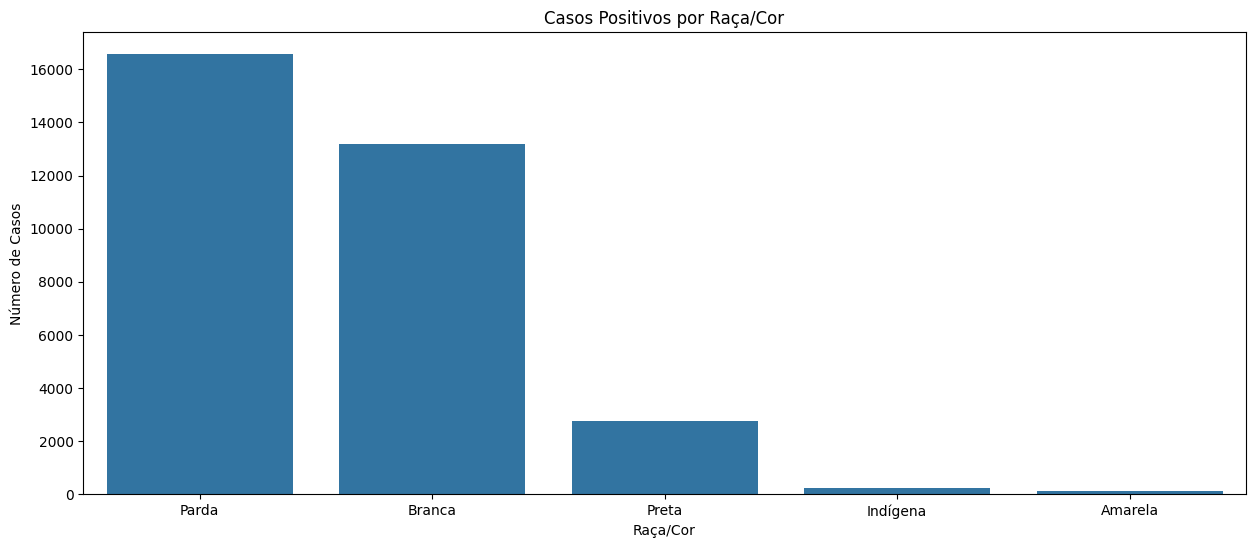

In [475]:
# Distribuição de casos positivos por Raça/Cor
plt.figure(figsize=(15,6))
sns.countplot(data=df_copy[df_copy['teste_positivo'] == 'sim'], x='raca_cor')
plt.ylabel('Número de Casos')
plt.xlabel('Raça/Cor')
plt.title('Casos Positivos por Raça/Cor')
plt.show()

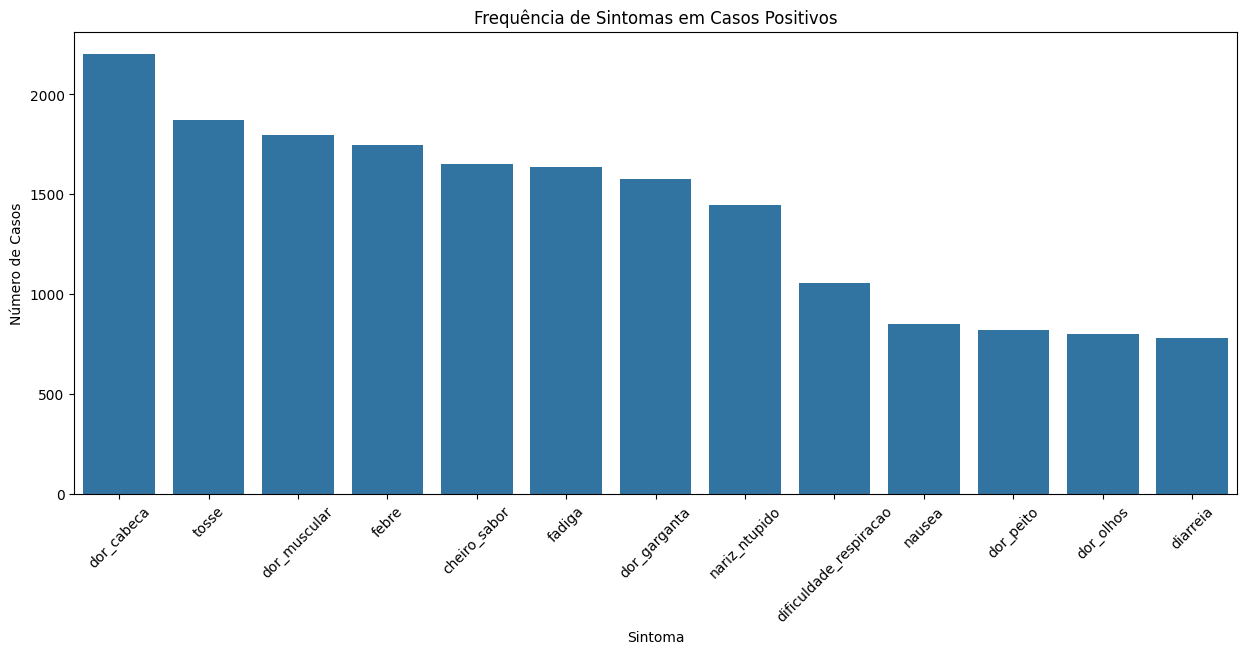

In [476]:
# Distribuição de casos positivos por sintoma
df_sintomas = sintomas[sintomas['teste_positivo'] == 'sim'].melt(
    id_vars=['teste_positivo'],
    value_vars=['febre', 'dor_olhos', 'cheiro_sabor', 'dor_muscular', 
                'diarreia', 'tosse', 'dor_garganta', 'dificuldade_respiracao', 
                'dor_cabeca', 'dor_peito', 'nausea', 'nariz_ntupido', 'fadiga'], 
    var_name='Sintoma', 
    value_name='Presente'
)

df_sintomas = df_sintomas[df_sintomas['Presente'] == 1]

plt.figure(figsize=(15,6))
sns.countplot(data=df_sintomas, x='Sintoma', order=df_sintomas['Sintoma'].value_counts().index)
plt.ylabel('Número de Casos')
plt.xlabel('Sintoma')
plt.xticks(rotation=45)
plt.title('Frequência de Sintomas em Casos Positivos')
plt.show()


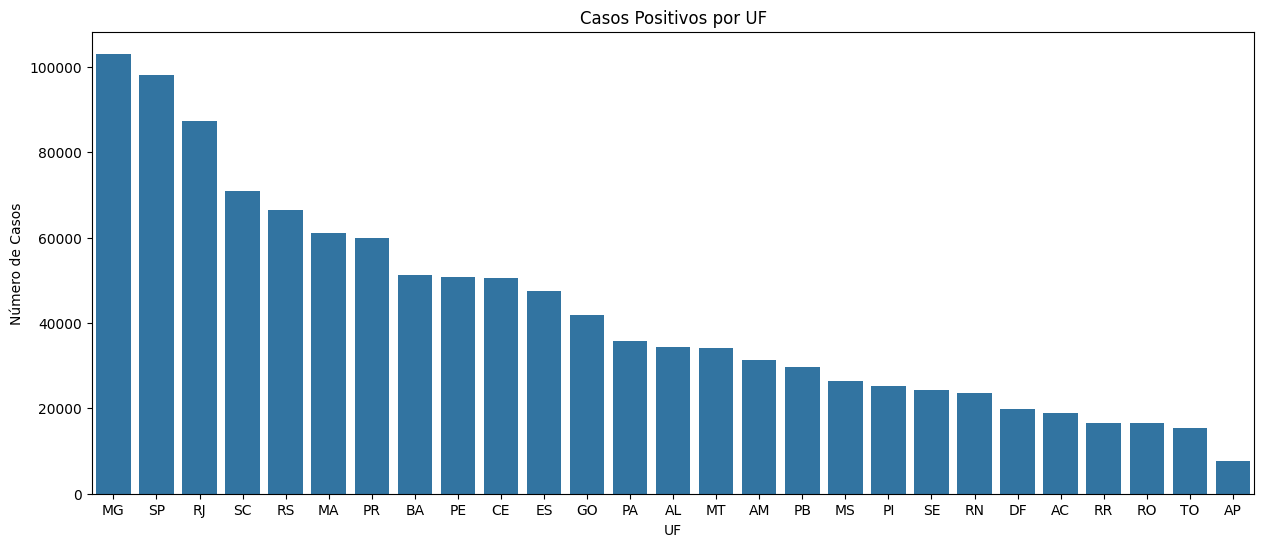

In [477]:
# Distribuição de casos positivos por UF
plt.figure(figsize=(15,6))
sns.countplot(data=df_copy[df_copy['teste_positivo'] == 'sim'], x=df_copy['uf'], order=df_copy['uf'].value_counts().index)
plt.ylabel('Número de Casos')
plt.xlabel('UF')
plt.title('Casos Positivos por UF')
plt.show()

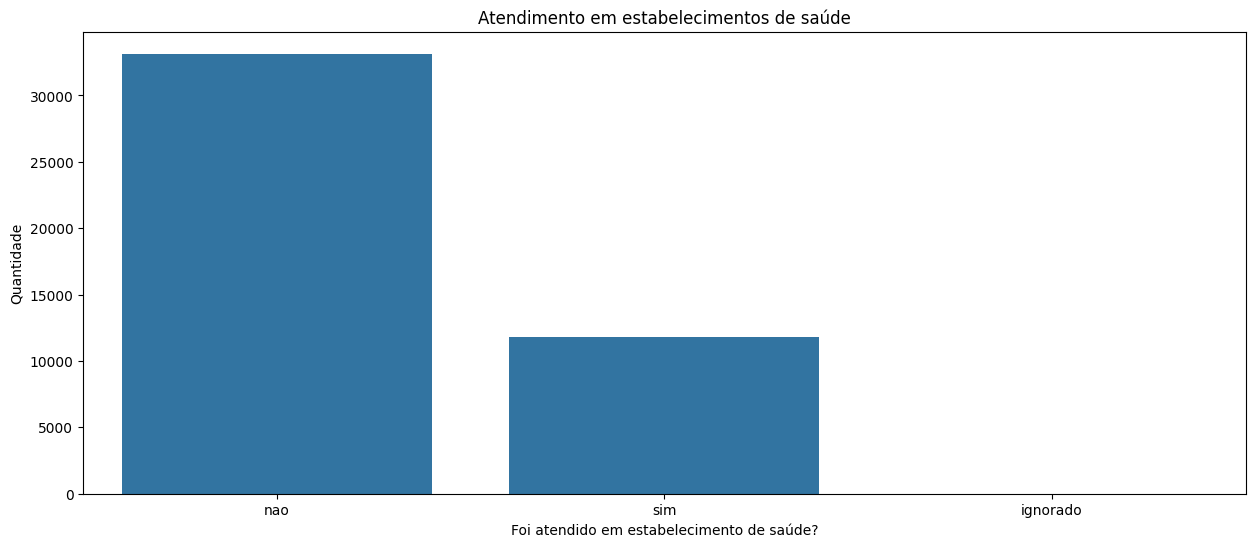

In [478]:
# Analisando comportamento da população
plt.figure(figsize=(15, 6))
sns.countplot(x=df_copy['foi_estab_saude'])
plt.title('Atendimento em estabelecimentos de saúde')
plt.ylabel('Quantidade')
plt.xlabel('Foi atendido em estabelecimento de saúde?')
plt.show()

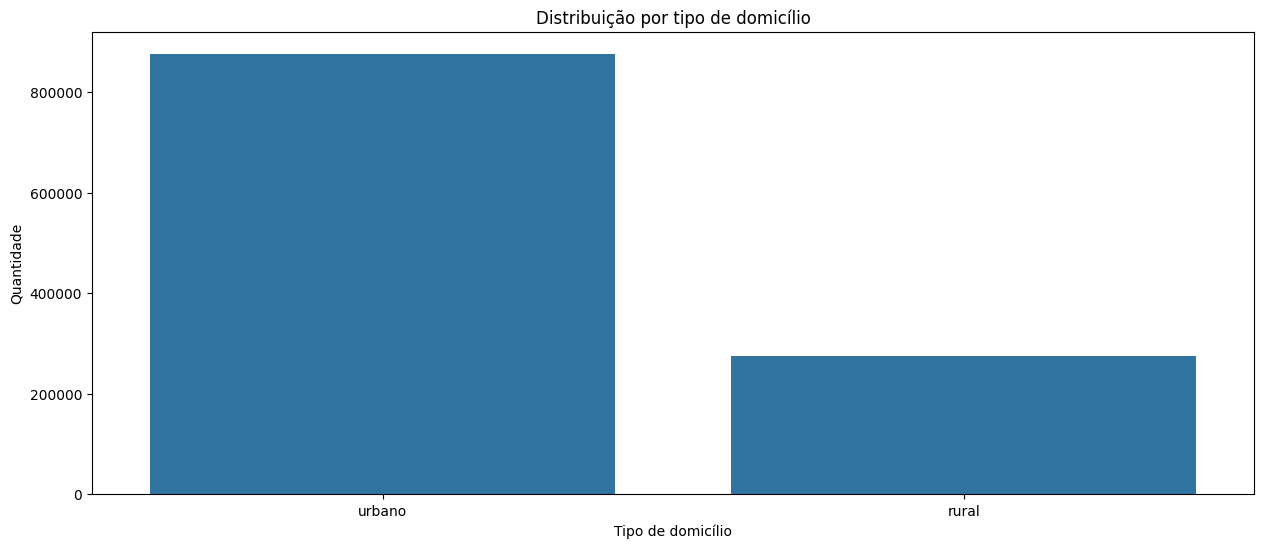

In [479]:
# Analisando características geograficas
plt.figure(figsize=(15, 6))
sns.countplot(x=df_copy['domicilio'])
plt.ylabel('Quantidade')
plt.xlabel('Tipo de domicílio')
plt.title('Distribuição por tipo de domicílio')
plt.show()

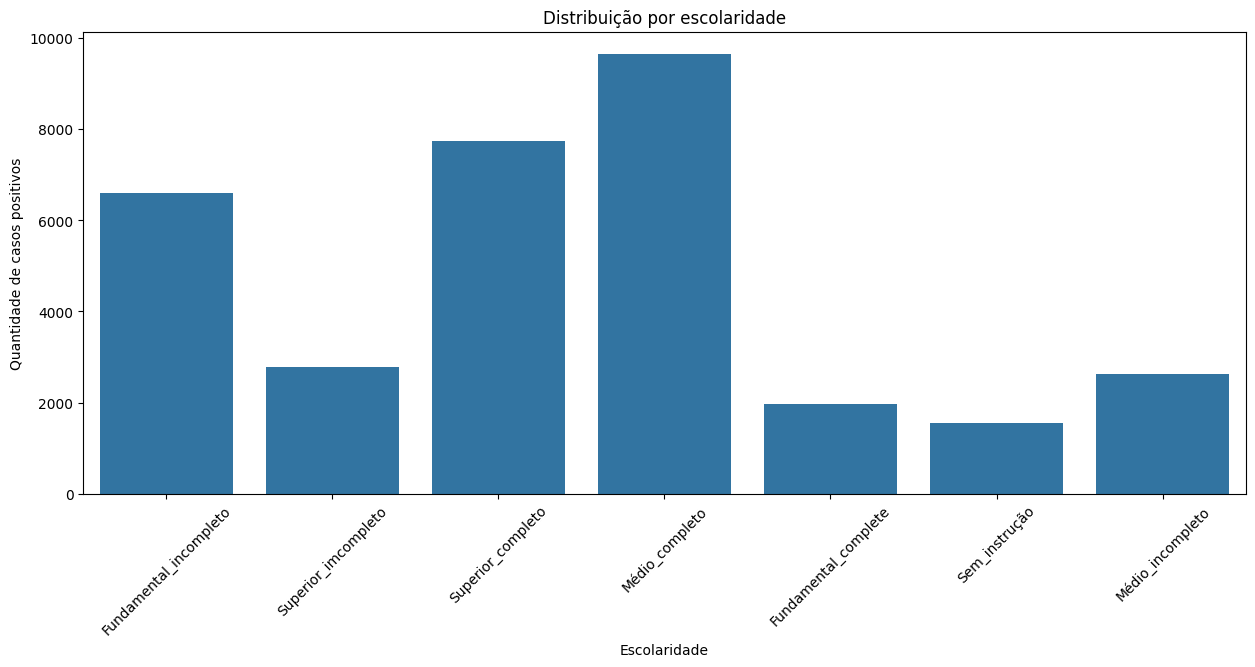

In [480]:
# Distribuição de casos positivos por escolaridade
plt.figure(figsize=(15, 6))
sns.countplot(data=df_copy[df_copy['teste_positivo'] == 'sim'], x='escolaridade')
plt.title('Distribuição por escolaridade')
plt.ylabel('Quantidade de casos positivos')
plt.xlabel('Escolaridade')
plt.xticks(rotation=45)
plt.show()

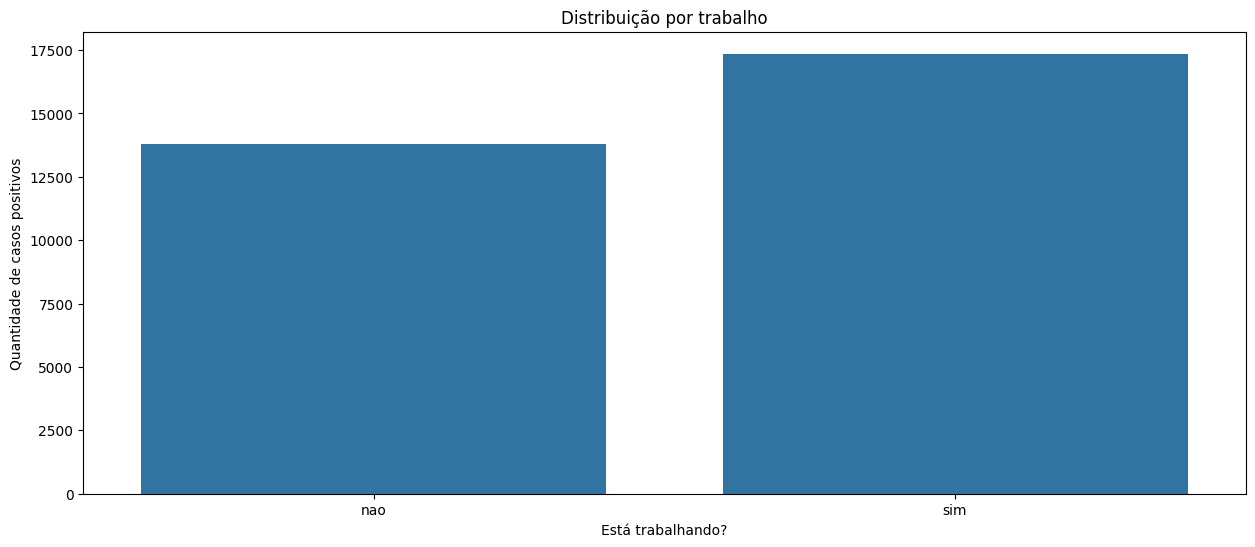

In [481]:
# Distribuição de casos positivos por trabalho
plt.figure(figsize=(15, 6))
sns.countplot(data=df_copy[df_copy['teste_positivo'] == 'sim'], x='trabalho')
plt.ylabel('Quantidade de casos positivos')
plt.xlabel('Está trabalhando?')
plt.title('Distribuição por trabalho')
plt.show()

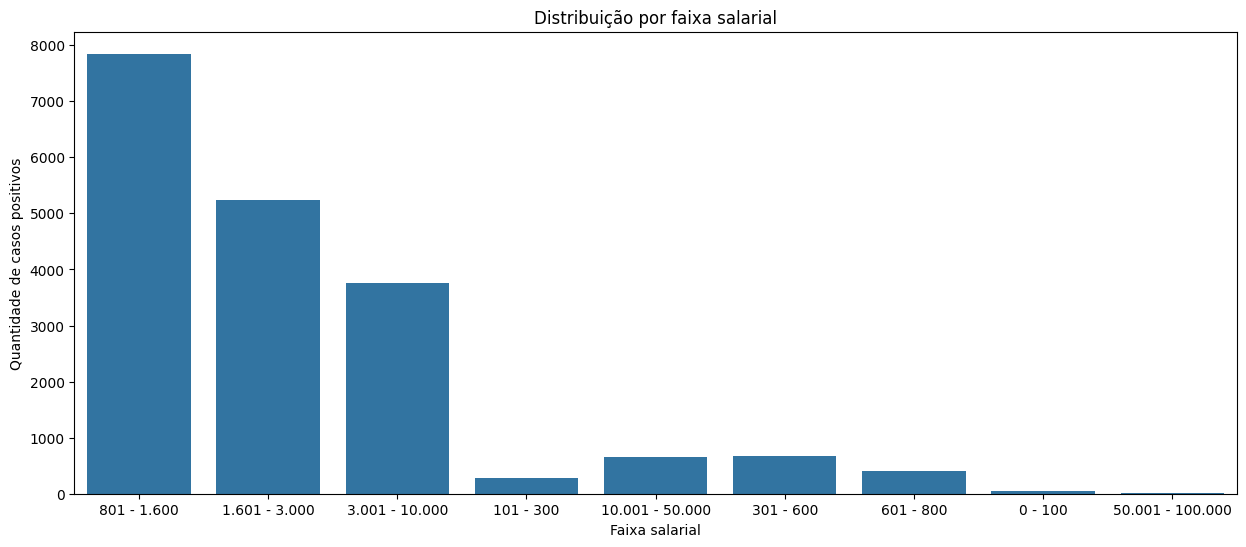

In [482]:
# Distribuição de casos positivos por faixa salarial
plt.figure(figsize=(15, 6))
sns.countplot(data=df_copy[df_copy['teste_positivo'] == 'sim'], x='faixa_salario')
plt.title('Distribuição por faixa salarial')
plt.ylabel('Quantidade de casos positivos')
plt.xlabel('Faixa salarial')
plt.show()

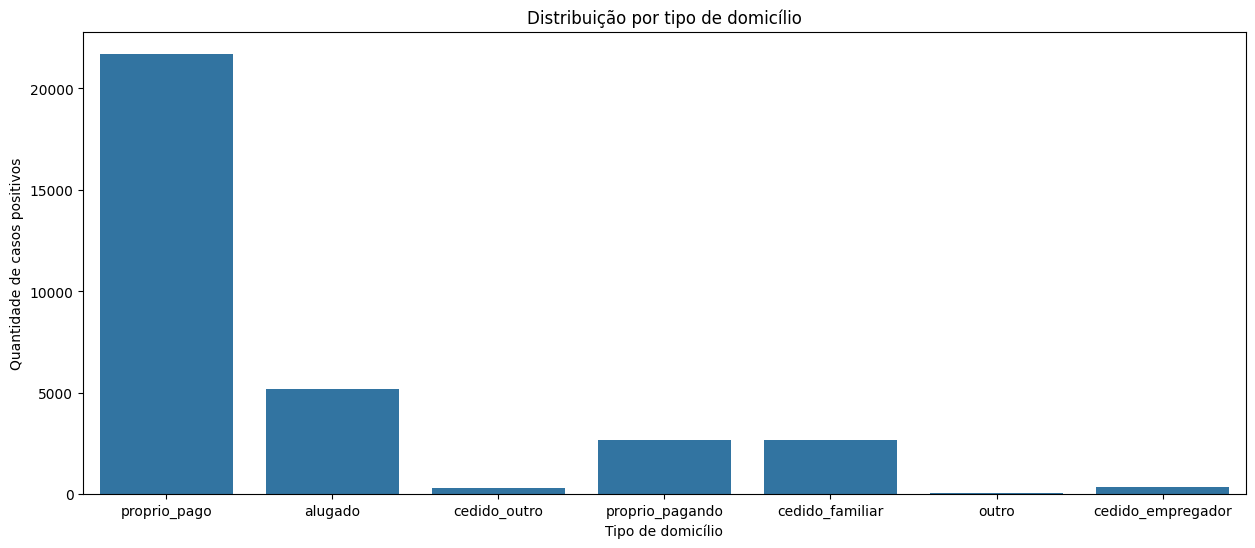

In [483]:
# Distribuição de casos positivos por tipo de domicílio
plt.figure(figsize=(15, 6))
sns.countplot(data=df_copy[df_copy['teste_positivo'] == 'sim'], x='tp_domicilio')
plt.title('Distribuição por tipo de domicílio')
plt.ylabel('Quantidade de casos positivos')
plt.xlabel('Tipo de domicílio')
plt.show()

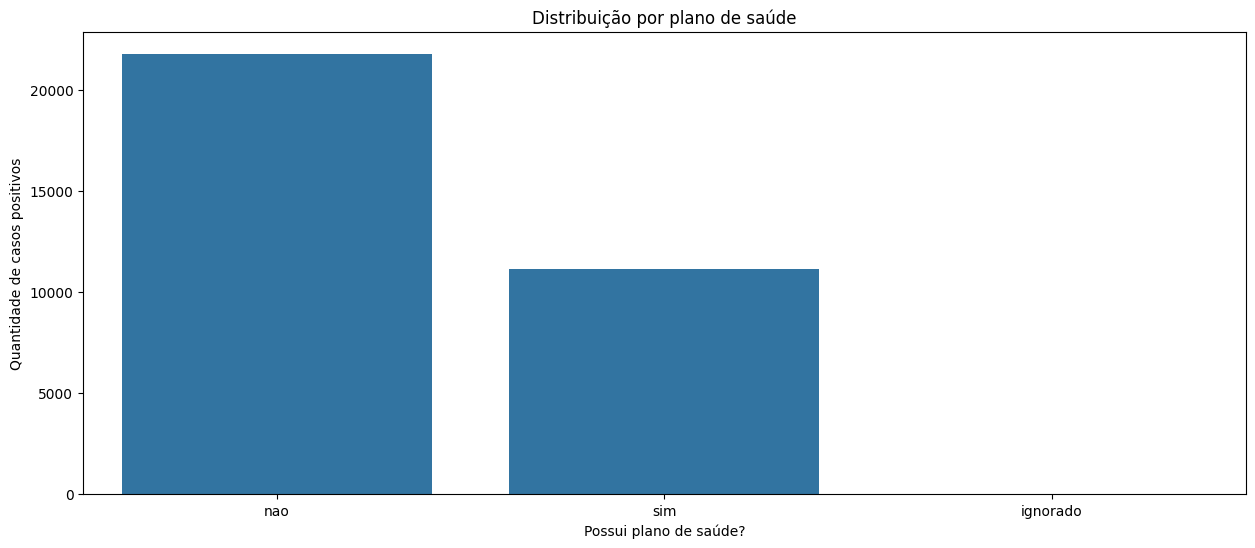

In [484]:
# Distribuição se tem ou não plano de saúde em caso de teste positivo
plt.figure(figsize=(15, 6))
sns.countplot(data=df_copy[df_copy['teste_positivo'] == 'sim'], x='plano_saude')
plt.title('Distribuição por plano de saúde')
plt.ylabel('Quantidade de casos positivos')
plt.xlabel('Possui plano de saúde?')
plt.show()

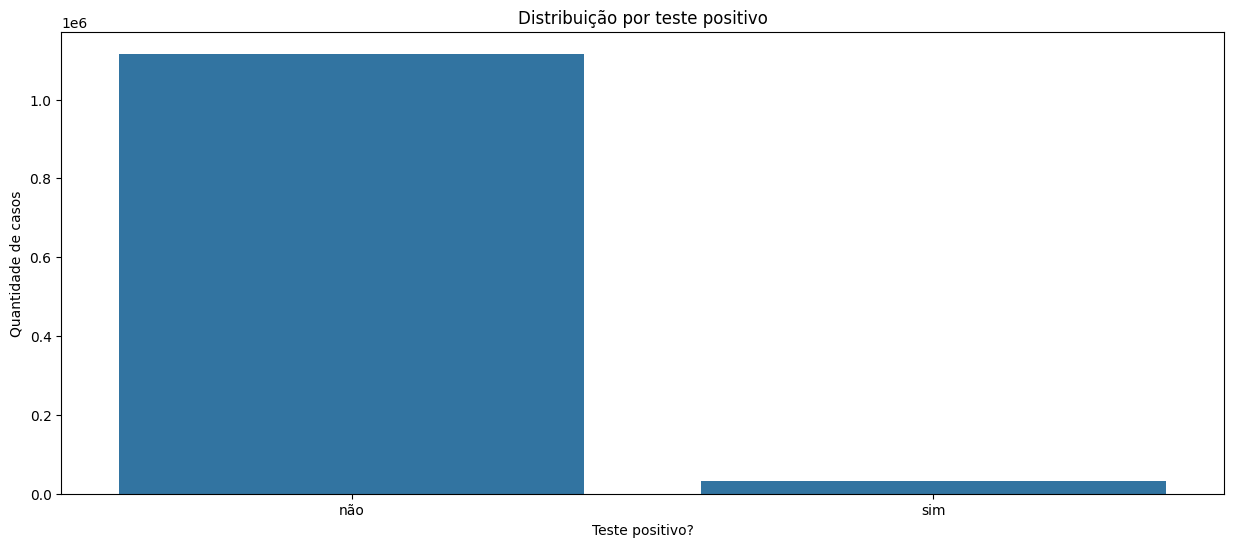

In [485]:
# Distribuição de casos positivos e negativos
plt.figure(figsize=(15, 6))
sns.countplot(data=df_copy, x='teste_positivo')
plt.title('Distribuição por teste positivo')
plt.ylabel('Quantidade de casos')
plt.xlabel('Teste positivo?')
plt.show()

In [486]:
# Criando um dataset com as colunas de estabelecimentos de saúde
df_estab_s = df_copy[tp_est_saude_cols + ['teste_positivo']]
df_estab_s.head()

,ubs,upa,hospital_sus,ambulatorio_pv,pront_scrr_pv,hospital_pv,teste_positivo
0,NaN,NaN,NaN,NaN,NaN,NaN,não
1,NaN,NaN,NaN,NaN,NaN,NaN,não
2,NaN,NaN,NaN,NaN,NaN,NaN,não
3,NaN,NaN,NaN,NaN,NaN,NaN,não
4,NaN,NaN,NaN,NaN,NaN,NaN,não


In [487]:
# Usando melt para transformar dataframe de wide para long
df_estab_s = df_copy[df_copy['teste_positivo'] == 'sim'].melt(
    id_vars=['teste_positivo'],
    value_vars=tp_est_saude_cols,
    var_name='estab_saude',
    value_name='presente'
)


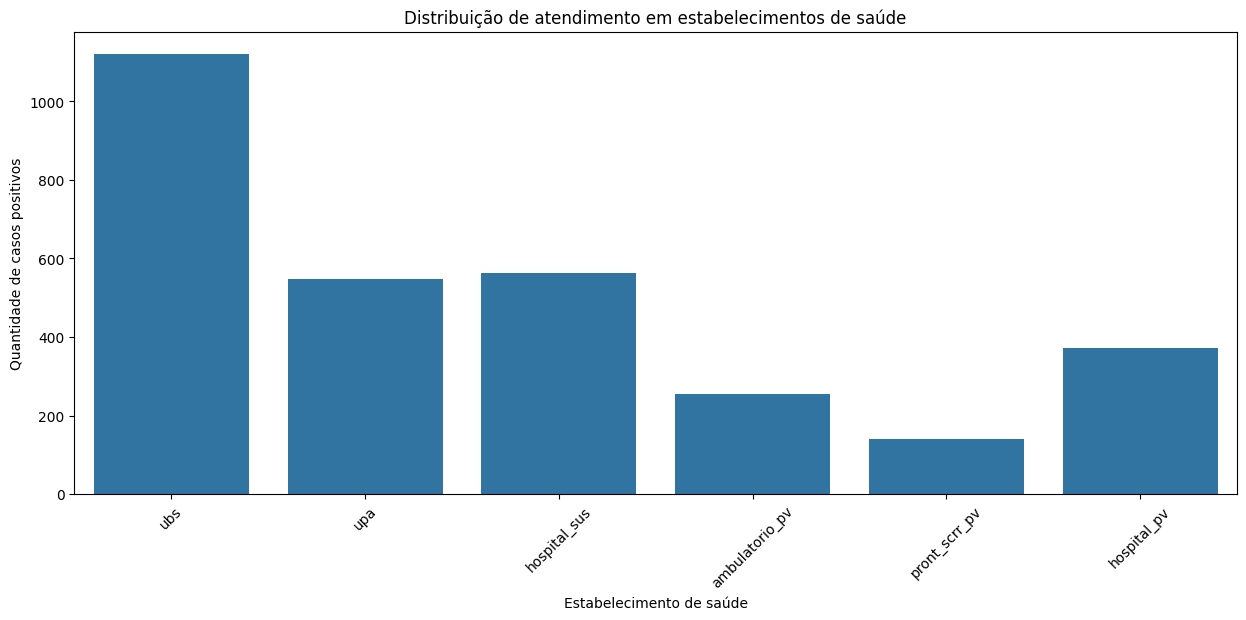

In [488]:
# Filtra os estabelecimentos de saúde e plotar o gráfico
df_estab_filtrado = df_estab_s[df_estab_s['presente'] == 1]
plt.figure(figsize=(15, 6))
sns.countplot(data=df_estab_filtrado, x='estab_saude')
plt.title('Distribuição de atendimento em estabelecimentos de saúde')
plt.ylabel('Quantidade de casos positivos')
plt.xlabel('Estabelecimento de saúde')
plt.xticks(rotation=45)
plt.show()

Recomendações para hospitais:
1. Monitorar sintomas mais comuns para triagem eficiente.
2. Garantir leitos suficientes para casos graves.
3. Reforçar campanhas de testagem e prevenção.
4. Avaliar impacto econômico e oferecer suporte adequado.
5. Identificar populações vulneráveis e direcionar recursos.
6. Implementar monitoramento digital para acompanhamento de sintomas em tempo real.
7. Reforçar o atendimento domiciliar e telemedicina para reduzir a sobrecarga hospitalar.
8. Melhorar a logística de suprimentos, garantindo estoques estratégicos.
9. Capacitar continuamente profissionais de saúde para manejo adequado de pacientes.
10. Criar centros de testagem rápida para identificar e isolar casos positivos com agilidade.

# Conclusão
A análise mostrou que os sintomas mais frequentes foram [citar os mais comuns], e houve uma relação entre [exemplo de correlação encontrada]. 
Além disso, observamos que [dados econômicos relevantes, como impacto na renda]. 
Diante dessas informações, recomenda-se que o hospital foque em:
1. Ações preventivas para os grupos de risco identificados.
2. Melhor estrutura para atendimento de sintomas mais comuns.
3. Monitoramento constante de tendências epidemiológicas para antecipação de novos surtos.